In [252]:
# Importing modules
import pandas as pd
import os
import numpy as np

cwd = os.getcwd()
pickled_data = '/Users/johnpapaioannou/Desktop/insight/project/nlp_models/full_transcripts.pkl'

print(pickled_data)
# Read data into papers
specials = pd.read_pickle(pickled_data)

# Print head
specials.head()
specials.shape

/Users/johnpapaioannou/Desktop/insight/project/nlp_models/full_transcripts.pkl


(126, 2)

In [262]:
# import and test out readability / reading level measures for 'smartness score'
import textstat

test_data = specials.iloc[0,1]
print('flesch reading ease: ', textstat.flesch_reading_ease(test_data))
print('smog index: ', textstat.smog_index(test_data))
print('flesch kincaid grade: ', textstat.flesch_kincaid_grade(test_data))
print('coleman liau index: ', textstat.coleman_liau_index(test_data))
print('automated readability index: ', textstat.automated_readability_index(test_data))

# dale chall is different from the rest, uses a lookup table of the 3,000 most commonly used words
print('dale chall readability score: ', textstat.dale_chall_readability_score(test_data))
print('difficult words: ', textstat.difficult_words(test_data))
print('linsear write formula: ', textstat.linsear_write_formula(test_data))
print('gunning fog: ', textstat.gunning_fog(test_data))
print('text standard: ', textstat.text_standard(test_data, float_output=True))

def text_standard(doc):
    return textstat.text_standard(doc, float_output=True)


readability = specials.transcript.map(text_standard)
dale_chall = specials.transcript.map(lambda x: textstat.dale_chall_readability_score(x))


flesch reading ease:  89.48
smog index:  7.6
flesch kincaid grade:  4.7
coleman liau index:  7.02
automated readability index:  7.8
dale chall readability score:  1.56
difficult words:  429
linsear write formula:  3.583333333333333
gunning fog:  6.91
text standard:  8.0


In [267]:
# readability statistics!
print('READABILITY SCORE')
print('\n mean: ', readability.mean())
print('\n1st quartile: ', np.quantile(readability, 0.25))
print('2nd quantil: ', np.quantile(readability, 0.5))
print('3rd quantile: ', np.quantile(readability, 0.75))
print('\ncomedian: ', specials.iloc[readability.idxmin(),0], ' min readability: ', readability.min())
print('comedian: ', specials.iloc[readability.idxmax(),0], ' max readability: ', readability.max())

smart_index = []
mid_index = []
low_index = []
for i in range(len(readability)):
    if readability[i] >= 7:
        smart_index.append(i)
    if readability[i] < 7 and readability[i] > 5:
        mid_index.append(i)
    if readability[i] <= 5:
        low_index.append(i)
smart_comics = specials.iloc[smart_index,0]
mid_comics = specials.iloc[mid_index,0]
low_comics = specials.iloc[low_index,0]
print('\nsmart comics:n', list(smart_comics))
print('\nmid_comics: \n', list(mid_comics))
print('\nlow_comics: \n', list(low_comics))

READABILITY SCORE

 mean:  6.0

1st quartile:  5.0
2nd quantil:  6.0
3rd quantile:  7.0

comedian:  maz jobrani  min readability:  1.0
comedian:  russell brand  max readability:  11.0

smart comics:n ['adam devine', 'adam sandler', 'bert kreischer', 'bill hicks', 'bill maher', 'bo burnham', 'brian regan', 'chelsea peretti', 'd l hughley', 'demetri martin', 'donald glover', 'dylan moran', 'eddie izzard', 'eddie murphy', 'ellen degeneres', 'emily heller', 'fahim anwar', 'gabriel iglesias', 'jerry seinfeld', 'john mulaney', 'lenny bruce', 'lewis black', 'michael mcintyre', 'neal brennan', 'nikki glaser', 'norm macdonald', 'pete holmes', 'rowan atkinson', 'russell brand', 'stewart lee', 'todd barry', 'tom segura', 'volker pispers']

mid_comics: 
 ['al madrigal', 'ali wong', 'anjelah johnson', 'aziz ansari', 'brad williams', 'bridget everett', 'cedric the entertainer', 'colin quinn', 'craig ferguson', 'dana carvey', 'daniel sloss', 'david cross', 'deray davis', 'doug stanhope', 'eddie griff

In [270]:
# readability statistics!
print('DALE-CHALL SCORE')
print('\n mean: ', dale_chall.mean())
print('\n1st quartile: ', np.quantile(dale_chall, 0.25))
print('2nd quantil: ', np.quantile(dale_chall, 0.5))
print('3rd quantile: ', np.quantile(dale_chall, 0.75))
print('\ncomedian: ', specials.iloc[dale_chall.idxmin(),0], ' min DC: ', dale_chall.min())
print('comedian: ', specials.iloc[dale_chall.idxmax(),0], ' max DC: ', dale_chall.max())

smart_index = []
mid_index = []
low_index = []
for i in range(len(dale_chall)):
    if dale_chall[i] >= 5.3:
        smart_index.append(i)
    if dale_chall[i] < 5.3 and dale_chall[i] > 2:
        mid_index.append(i)
    if dale_chall[i] <= 2:
        low_index.append(i)
smart_comics = specials.iloc[smart_index,0]
mid_comics = specials.iloc[mid_index,0]
low_comics = specials.iloc[low_index,0]
print('\nsmart comics:n', list(smart_comics))
print('\nmid_comics: \n', list(mid_comics))
print('\nlow_comics: \n', list(low_comics))

DALE-CHALL SCORE

 mean:  3.407460317460316

1st quartile:  1.3025000000000002
2nd quantil:  5.015
3rd quantile:  5.31

comedian:  kevin hart  min DC:  0.9
comedian:  russell brand  max DC:  6.1

smart comics:n ['al madrigal', 'ali wong', 'bill hicks', 'bill maher', 'bo burnham', 'brian regan', 'chelsea peretti', 'd l hughley', 'dana carvey', 'david cross', 'doug stanhope', 'dylan moran', 'emily heller', 'fahim anwar', 'frankie boyle', 'jack whitehall', 'jeff foxworthy', 'jerry seinfeld', 'john leguizamo', 'lenny bruce', 'lewis black', 'lisa lampanelli', 'maria bamford', 'mike birbiglia', 'neal brennan', 'nick offerman', 'patton oswalt', 'robin williams', 'rowan atkinson', 'russell brand', 'stewart lee', 'todd barry', 'vir das', 'volker pispers']

mid_comics: 
 ['adel karam', 'anjelah johnson', 'colin quinn', 'daniel sloss', 'daniel tosh', 'demetri martin', 'enissa amani', 'erik griffin', 'fred armisen', 'gina yashere', 'greg davies', 'hannah gadsby', 'hannibal buress', 'hasan minhaj',

In [296]:
# function to parts-of-speech tag if it helps the model
import nltk

def pos_parser(blurb):
    pos_of_interest = ['NN', 'NNS']
    tokens = nltk.word_tokenize(blurb)
    token_pos = nltk.pos_tag(tokens)

    pos_list = []
    for i in range(len(pos_of_interest)):
        pos_list.append([])
    
    i=0
    for pos in pos_of_interest:
        for token_tuple in token_pos:
            if token_tuple[1] == pos:
                pos_list[i].append(token_tuple[0])
        i+=1

    #clean up list, count duplicates? remove punctuation?
    all_nouns = pos_list[0] + pos_list[1]
    return all_nouns

In [215]:
# Load the regular expression library
import re

# Remove punctuation
specials['transcript'] = specials['transcript'].map(lambda x: re.sub('[,\'”+"\.+!?]', '', x))
# Remove ellipsis, r'(\w+)\.{3,}'
#specials['transcript'] = specials['transcript'].map(lambda x: re.sub('(\w+)\.{3,}', '', x))

# Convert the titles to lowercase
specials['transcript'] = specials['transcript'].map(lambda x: x.lower())

# Get rid of bracketed applause reactions
specials['transcript'] = specials['transcript'].map(lambda x: re.sub(r"\[([A-Za-z0-9_]+)\]", '', x, count=0, flags=0))
# Print out the first rows of papers
specials['transcript'].head()
print(specials.iloc[2,1])



a netflix comedy special
recorded at the casino du liban beirut
hello wow this is great this is great good evening good evening god rest his soul hello there “hello so bored how are you all this is so cool that much hello up there good evening yeah i see you it’s like you’ve arrived from outer space i want to say thank you for being here thank you for traveling all the way from beirut to be here quite a distance i came on thursday so i wouldn’t be late i usually don’t travel for anyone see how important you are to me i came on thursday
can i come down and kiss you all will this make you late for anything if i come down to kiss you all we love to kiss it’s amazing how much we love it we lebanese just adore kissing each other is anyone here not lebanese yeah where are you from – where are you from – jordan jordan you arrived from jordan just now welcome i have a real issue with jordanians you know why because you kiss three times just like us we kiss three times and i didn’t know that i

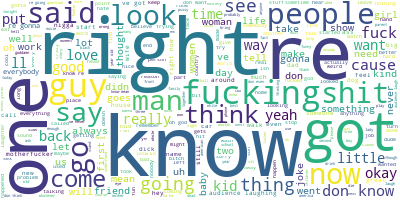

In [115]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
def wordup(series):
    long_string = ','.join(list(series.values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

    return wordcloud
    
wordcloud = wordup(specials.transcript)
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [350]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
nltk.download('wordnet')
stemmer = SnowballStemmer('english')
comedy_cliche = ['like', 'know', 'say', 'look', 'come', 'right', 'go', 'think']

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnpapaioannou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [283]:
# lemmatize and remove stop words!
# include profanity filter and prediction!
import numpy as np
from profanity_check import predict, predict_prob
    
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            if token not in comedy_cliche:
                result.append(lemmatize_stemming(token))
    return result

def profanity_prob(text):
    prof = predict_prob(text)
    return np.mean(prof)
def prof_ratio(text):
    prof = predict(text)
    return sum(prof)/len(prof)

In [292]:
processed_transcripts = specials['transcript'].map(preprocess)

In [285]:
profanity_score = processed_transcripts.map(profanity_metric)
profanity_ratio = processed_transcripts.map(prof_ratio)

In [289]:
print('using profanity probability: \n')
print('index: ', profanity_score.idxmax(), 'profanity_score: ', profanity_score.max())
print('index: ', profanity_score.idxmin(), 'profanity_score: ', profanity_score.min())
print('mean: ', profanity_score.mean())
print('1st quartile: ', np.quantile(profanity_score, 0.25))
print('2nd quartile: ', np.quantile(profanity_score, 0.5))
print('3rd quartile: ', np.quantile(profanity_score, 0.75))

print('cleanest comedian: ', specials.iloc[profanity_score.idxmin(),0])
print('dirtiest comedian: ', specials.iloc[profanity_score.idxmax(),0])

print('\n using profanity ratio: \n')
print('index: ', profanity_ratio.idxmax(), 'profanity_ratio: ', profanity_ratio.max())
print('index: ', profanity_ratio.idxmin(), 'profanity_ratio: ', profanity_ratio.min())
print('mean: ', profanity_ratio.mean())
print('1st quartile: ', np.quantile(profanity_ratio, 0.25))
print('2nd quartile: ', np.quantile(profanity_ratio, 0.5))
print('3rd quartile: ', np.quantile(profanity_ratio, 0.75))
print('cleanest comedian: ', specials.iloc[profanity_ratio.idxmin(),0])
print('dirtiest comedian: ', specials.iloc[profanity_ratio.idxmax(),0])

dirty_index = []
mid_index = []
clean_index = []
for i in range(len(profanity_ratio)):
    if profanity_ratio[i] >= 0.05:
        dirty_index.append(i)
    if profanity_ratio[i] < 0.05 and profanity_ratio[i] > 0.0125:
        mid_index.append(i)
    if profanity_ratio[i] <= 0.0125:
        clean_index.append(i)
dirty_comics = specials.iloc[dirty_index,0]
mid_comics = specials.iloc[mid_index,0]
clean_comics = specials.iloc[clean_index,0]
print('\n', len(dirty_comics), ' dirty comics: \n', list(dirty_comics))
print('\n', len(mid_comics), ' mid_comics: \n', list(mid_comics))
print('\n', len(clean_comics), ' clean_comics: \n', list(clean_comics))

using profanity probability: 

index:  39 profanity_score:  0.20071328713334313
index:  48 profanity_score:  0.11873751253242229
mean:  0.1473566282782865
1st quartile:  0.13304297592419778
2nd quartile:  0.1425213084236024
3rd quartile:  0.15845160701123404
cleanest comedian:  fred armisen
dirtiest comedian:  eddie griffin

 using profanity ratio: 

index:  39 profanity_ratio:  0.12974152400134273
index:  6 profanity_ratio:  0.0004253509145044662
mean:  0.035049594934001164
1st quartile:  0.012559598421043537
2nd quartile:  0.02846547049367992
3rd quartile:  0.049125965042251106
cleanest comedian:  anjelah johnson
dirtiest comedian:  eddie griffin

 30  dirty comics: 
 ['adam sandler', 'big jay oakerson', 'bill burr', 'brent morin', 'bridget everett', 'cedric the entertainer', 'chris rock', 'd l hughley', 'dave chappelle', 'deray davis', 'doug stanhope', 'eddie griffin', 'eddie murphy', 'erik griffin', 'jim jefferies', 'jo koy', 'joe rogan', 'katt williams', 'ken jeong', 'kevin hart',

In [395]:
# create dataframe with comedian and edginess score columns and export to pkl
df = specials.copy()
df['edginess'] = profanity_ratio
print(df.head())
df = df.drop(columns=['transcript'])
print(df.head())

       comedian                                         transcript  edginess
0   adam devine  \n[rock music playing]\n[indistinct chatter]\n...  0.049731
1  adam sandler  \n[man] Okay, ready, and… Take your own cue, A...  0.064610
2    adel karam  \nA NETFLIX COMEDY SPECIAL\nRecorded at the Ca...  0.008130
3   al madrigal  \n[dog barks] [FisherGreen’s Sisters Brothers ...  0.019935
4      ali wong  \nLadies and gentlemen, please welcome to the ...  0.034314
       comedian  edginess
0   adam devine  0.049731
1  adam sandler  0.064610
2    adel karam  0.008130
3   al madrigal  0.019935
4      ali wong  0.034314


In [399]:
import pickle

data_path = '/Users/johnpapaioannou/Desktop/insight/project/data/'
file_path = data_path + 'comedian_edginess.pkl'
df.to_pickle(file_path)

In [344]:
transcript_nouns = specials.transcript.map(pos_parser)

In [335]:
from itertools import compress

test_clean = predict(transcript_nouns[0])
test_clean = 1 - test_clean
list(compress(transcript_nouns[0], test_clean))

['[',
 'rock',
 'music',
 'chatter',
 'man',
 'crowd',
 'man',
 '[',
 ']',
 's',
 'everybody',
 'seat',
 '[',
 'crowd',
 ']',
 'thing',
 'gon',
 'blast',
 'tonight',
 'crowd',
 'cause',
 'adult',
 'man',
 ']',
 'laughter',
 'laughter',
 'kid',
 'laughter',
 ']',
 't',
 'kind',
 'weirdo',
 'laughter',
 ']',
 'face',
 'adult',
 'kid',
 'school',
 'lunch',
 'today',
 '”',
 'quality',
 'face',
 'child',
 'mom',
 'bouncy',
 'ball',
 'birthday',
 't',
 'cool',
 '[',
 '[',
 'laughter',
 'bouncy',
 'ball',
 'driveway',
 'like…',
 'midair',
 'phrase',
 'youth',
 'adult',
 'Everything',
 'child',
 'midair',
 'abyss',
 'midair',
 'midair',
 'midair',
 'midair.',
 'mom',
 's',
 'laughter',
 'course',
 'midair',
 'honey',
 'anything',
 'air…',
 'laughter',
 'midair',
 '‘',
 'ground',
 'd',
 'boy.',
 '[',
 'laughter',
 'cool',
 'level',
 'elevator',
 'deal',
 '[',
 'stairs',
 's',
 '[',
 'laughter',
 'elevator',
 'day',
 'cause',
 'adult',
 'adult',
 'fabric',
 'suede',
 'elevator',
 '”',
 't',
 'la

In [345]:
transcript_nouns_clean = transcript_nouns
for i in range(len(transcript_nouns)):
    clean_filter = predict(transcript_nouns[i])
    clean_filter = 1 - clean_filter
    transcript_nouns_clean[i] = list(compress(transcript_nouns[i], clean_filter))
    transcript_nouns[i] = " ".join(transcript_nouns[i])

#print(transcript_nouns)
print(transcript_nouns_clean)

0      [ rock music chatter man crowd man [ ] s every...
1      man cue action [ piano day smile ♪ way style ♪...
2      du evening evening soul evening space thank wa...
3      dog s welcome [ applause name s house waterfal...
4      stage t gon ♪ ♪ ♪ niggas this♪ ♪ moonshine♪ ♪ ...
5      something lot behavior city night ” crowd stra...
6      trip wardrobe jewelry collection marriage cour...
7      friend ’ wife day influence husband name word....
8      collection set Adulthood night intermission wa...
9      house everybody house tonight s mix a… minorit...
10     [ applause male presenter [ rock music crowd a...
11     [ crowd rock music hey [ applause [ applause ]...
12     cheering applause ] announcer arena [ audience...
13     horse s moon play horse man hat cloak horse ri...
14     variety standup special greeting purpose show ...
15     farm E farm pig E snort farm E male product gi...
16     bluesy rock music pop rock music time tonight ...
17     Shot confrontation secur

In [346]:
processed_nouns = transcript_nouns.map(preprocess)
processed_nouns_clean = transcript_nouns_clean.map(preprocess)

In [310]:
print(processed_nouns)

0      [rock, music, chatter, crowd, everybodi, seat,...
1      [action, piano, smile, style, jammin, jawin, w...
2      [even, even, soul, even, space, thank, distanc...
3      [welcom, applaus, hous, waterfal, wife, neighb...
4      [stage, nigga, moonshin, robberi, lotteri, sho...
5      [behavior, citi, night, crowd, stranger, condo...
6      [trip, wardrob, jewelri, collect, marriag, cou...
7      [friend, wife, influenc, husband, bitch, word,...
8      [collect, adulthood, night, intermiss, wardrob...
9      [shit, hous, everybodi, hous, tonight, minor, ...
10     [applaus, male, present, rock, music, crowd, a...
11     [crowd, rock, music, applaus, applaus, rock, m...
12     [cheer, applaus, announc, arena, dick, shit, a...
13     [hors, moon, play, hors, cloak, hors, rider, h...
14     [varieti, standup, special, greet, purpos, mar...
15     [farm, farm, snort, farm, male, product, giraf...
16     [bluesi, rock, music, rock, music, time, tonig...
17     [shoot, confront, secur,

In [276]:
dictionary = gensim.corpora.Dictionary(processed_transcripts)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_transcripts]

In [277]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.024753029451099865),
 (1, 0.018092186132780186),
 (2, 0.007546821075548641),
 (3, 0.009270450670934032),
 (4, 0.0048448773333210305),
 (5, 0.012329470691312324),
 (6, 0.005891628709269734),
 (7, 0.0060613267333453884),
 (8, 0.10783276303900255),
 (9, 0.014390712784939037),
 (10, 0.04745362685949976),
 (11, 0.012329470691312324),
 (12, 0.020611843197837352),
 (13, 0.006285692534634889),
 (14, 0.0035976781962347593),
 (15, 0.014568065041159914),
 (16, 0.0051328174768728654),
 (17, 0.003612514916276046),
 (18, 0.003374439946445253),
 (19, 0.0017504424560072203),
 (20, 0.0037734105377743203),
 (21, 0.06699177235331806),
 (22, 0.0015627473695663185),
 (23, 0.003374439946445253),
 (24, 0.004236779794561871),
 (25, 0.024939900472620204),
 (26, 0.0032609993310217474),
 (27, 0.024753029451099865),
 (28, 0.010793034588704278),
 (29, 0.0020102429036422433),
 (30, 0.015093642151097281),
 (31, 0.006707594991698947),
 (32, 0.0006829823284026595),
 (33, 0.02889421570436238),
 (34, 0.0123980694

In [155]:
# running LDA on bag-of-words first
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# a lot of typical communicative language in standup is getting picked up but they're meaningless!

#add to stop words, ['like', 'know', 'say', 'look', 'come', 'right', 'go', 'think']

Topic: 0 
Words: 0.014*"say" + 0.013*"go" + 0.012*"fuck" + 0.009*"peopl" + 0.008*"thing" + 0.007*"want" + 0.007*"gonna" + 0.007*"shit" + 0.006*"tell" + 0.006*"caus"
Topic: 1 
Words: 0.020*"fuck" + 0.013*"go" + 0.012*"gonna" + 0.010*"say" + 0.010*"peopl" + 0.009*"shit" + 0.009*"time" + 0.008*"thing" + 0.007*"yeah" + 0.006*"okay"
Topic: 2 
Words: 0.013*"peopl" + 0.011*"gonna" + 0.010*"say" + 0.010*"fuck" + 0.010*"go" + 0.008*"time" + 0.008*"want" + 0.008*"thing" + 0.007*"good" + 0.007*"yeah"
Topic: 3 
Words: 0.015*"peopl" + 0.015*"fuck" + 0.011*"want" + 0.011*"go" + 0.010*"thing" + 0.008*"littl" + 0.008*"say" + 0.007*"time" + 0.007*"yeah" + 0.007*"love"
Topic: 4 
Words: 0.023*"fuck" + 0.015*"peopl" + 0.011*"go" + 0.010*"want" + 0.010*"gonna" + 0.008*"shit" + 0.007*"thing" + 0.007*"okay" + 0.007*"come" + 0.006*"say"
Topic: 5 
Words: 0.019*"fuck" + 0.018*"go" + 0.014*"say" + 0.011*"shit" + 0.010*"peopl" + 0.009*"gonna" + 0.008*"want" + 0.008*"time" + 0.008*"thing" + 0.007*"tell"
Topic: 6 


In [317]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"nigga" + 0.000*"fuck" + 0.000*"crowd" + 0.000*"motherfuck" + 0.000*"rowan" + 0.000*"laughter" + 0.000*"mama" + 0.000*"hasan" + 0.000*"drummer" + 0.000*"brent"
Topic: 1 Word: 0.001*"laughter" + 0.000*"fuck" + 0.000*"nigga" + 0.000*"audienc" + 0.000*"fuckin" + 0.000*"cheer" + 0.000*"applaus" + 0.000*"motherfuck" + 0.000*"chuckl" + 0.000*"trump"
Topic: 2 Word: 0.000*"laughter" + 0.000*"explet" + 0.000*"fuck" + 0.000*"dick" + 0.000*"pinki" + 0.000*"applaus" + 0.000*"porn" + 0.000*"josi" + 0.000*"prom" + 0.000*"jigsaw"


In [356]:
# iterative process of filtering out meaningless filler words
fillers = ['peopl', 'think', 'audienc', 'time', 'caus', 'laughter']

In [380]:
# now repeat LDA modeling but on preprocessed nouns from transcripts
dic_nouns_clean = gensim.corpora.Dictionary(processed_nouns_clean)

dic_nouns_clean.filter_extremes(no_below=5, no_above=0.1, keep_n=50)

bow_corpus_nouns_clean = [dictionary.doc2bow(doc) for doc in processed_nouns_clean]

In [381]:
# running LDA on bag-of-words first
lda_model = gensim.models.LdaMulticore(bow_corpus_nouns_clean, num_topics=3, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.009*"kind" + 0.009*"thing" + 0.006*"year" + 0.005*"kid" + 0.005*"room" + 0.005*"countri" + 0.005*"women" + 0.004*"stuff" + 0.004*"wife" + 0.004*"life"
Topic: 1 
Words: 0.022*"thing" + 0.011*"year" + 0.008*"life" + 0.007*"friend" + 0.006*"woman" + 0.006*"women" + 0.006*"joke" + 0.006*"girl" + 0.006*"kid" + 0.006*"kind"
Topic: 2 
Words: 0.017*"thing" + 0.009*"year" + 0.008*"friend" + 0.008*"kid" + 0.007*"life" + 0.007*"woman" + 0.007*"girl" + 0.006*"babi" + 0.006*"hous" + 0.005*"guy"


In [359]:
# now repeat tf-idf for nouns
tfidf_nouns = models.TfidfModel(bow_corpus_nouns_clean)
corpus_tfidf_nouns = tfidf_nouns[bow_corpus_nouns_clean]

In [360]:
lda_model_tfidf_nouns = gensim.models.LdaMulticore(corpus_tfidf_nouns, num_topics=4, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model_tfidf_nouns.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.000*"laughter" + 0.000*"audienc" + 0.000*"titti" + 0.000*"dude" + 0.000*"cheer" + 0.000*"goddamn" + 0.000*"damn" + 0.000*"tit" + 0.000*"boyfriend" + 0.000*"cream"
Topic: 1 Word: 0.000*"audienc" + 0.000*"laughter" + 0.000*"folk" + 0.000*"presid" + 0.000*"nigga" + 0.000*"robot" + 0.000*"gorilla" + 0.000*"cheer" + 0.000*"caus" + 0.000*"massag"
Topic: 2 Word: 0.001*"laughter" + 0.000*"motherfuck" + 0.000*"applaus" + 0.000*"mama" + 0.000*"audienc" + 0.000*"cheer" + 0.000*"chuckl" + 0.000*"dude" + 0.000*"gang" + 0.000*"prom"
Topic: 3 Word: 0.000*"laughter" + 0.000*"crowd" + 0.000*"burger" + 0.000*"perkin" + 0.000*"pfft" + 0.000*"headmast" + 0.000*"balconi" + 0.000*"medit" + 0.000*"halamaha" + 0.000*"tit"
